<a href="https://colab.research.google.com/github/JSRV18/Dinosaurio-repository/blob/main/Simulaci%C3%B3n_Qu%C3%ADmica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pint
!pip install pint uncertainties
import uncertainties
from uncertainties import ufloat
import pint as pint
ureg=pint.UnitRegistry(auto_reduce_dimensions=True)
Measurement=ureg.Measurement
Quantity=ureg.Quantity

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 2.9 MB/s eta 0:00:00


In [2]:
M = Quantity([0, 0.4e-7, 0.9e-7, 1.4e-7, 1.9e-7, 2.4e-7], 'M')
I = Quantity([0, 36, 87, 138, 185, 242])

/usr/local/lib/python3.11/dist-packages/numpy/ma/core.py:2846: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  _data = np.array(data, dtype=dtype, copy=copy,


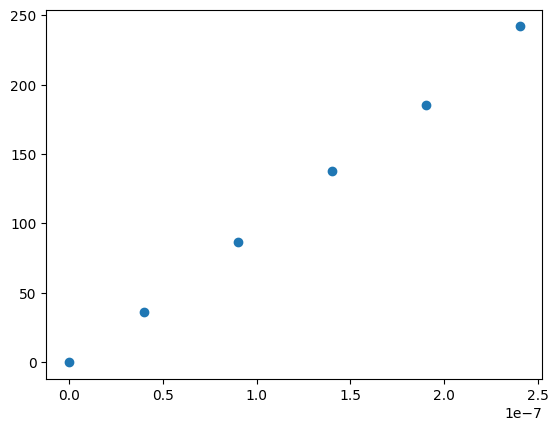

In [3]:
import matplotlib.pyplot as plt

plt.scatter(M, I)
plt.show()

In [4]:
def modelo(x, m, b):
  return m*x + b

from scipy.optimize import curve_fit

popt, pcov = curve_fit(modelo, M.m, I)

popt

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:647: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  a = asarray(a, dtype=dtype, order=order)


array([ 1.00532258e+09, -2.62096777e+00])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py:839: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  array = numpy.asarray(array, order=order, dtype=dtype)
/usr/local/lib/python3.11/dist-packages/numpy/ma/core.py:2846: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  _data = np.array(data, dtype=dtype, copy=copy,


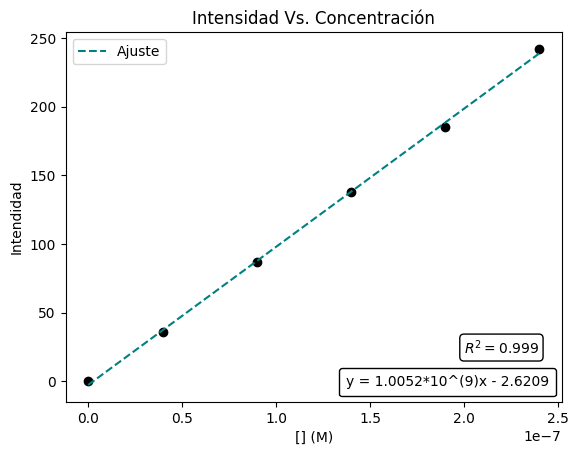

In [5]:
from matplotlib.offsetbox import AnchoredText, AnchoredOffsetbox
from sklearn.metrics import r2_score

# Calcular los valores predichos por el modelo
I_pred = modelo(M.m, *popt)

# Calcular el R^2
r2 = r2_score(I, I_pred)

# Imprimir el valor del R^2

from matplotlib.offsetbox import AnchoredText

ecuacion = f'y = 1.0052*10^(9)x - 2.6209'  # Formato de la ecuación
r_2 = f'$R^2 = {r2:.3f}$'
plt.text(
    2.0e-7, 20,  # Coordenadas X, Y ajustables
    r_2,
    fontsize=10,
    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="black")
)

anchored_text = AnchoredText(ecuacion, loc='lower right', frameon=True)
anchored_text.patch.set_boxstyle("round,pad=0.11,rounding_size=0.2") # Estilo del cuadro
plt.gca().add_artist(anchored_text)

plt.scatter(M, I, c='k')
plt.plot(M.m, modelo(M.m, *popt), c='teal', linestyle = '--', label = 'Ajuste')
plt.legend()
plt.title('Intensidad Vs. Concentración')
plt.xlabel('[] (M)')
plt.ylabel('Intendidad')
plt.show()

In [6]:
print(f"R^2: {r2}")

R^2: 0.9992147542155747


In [25]:
import numpy as np

I_1 = 130
I_2 = 240

C1 = (I_1 - popt[1]) / popt[0]
C2 = (I_2 - popt[1]) / popt[0]

np.round(C1, 9), np.round(C2, 9)

(np.float64(1.32e-07), np.float64(2.41e-07))